### Versiones de los paquetes usados en este script

* pandas==2.1.4
* matplotlib=3.7.3
* numpy==1.26.4
* seaborn==0.12.2
* sklearn==1.2.2
* keras==2.12.0

# DATASETS

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
data_set = pd.read_csv('/Users/alejandroysasi/Documents/TFG Mates/Prostate_Cancer_Raw_Dataset.csv')

In [5]:
data_set

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...,...
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066


In [6]:
data_set = pd.read_csv('/Users/alejandroysasi/Documents/TFG Mates/Prostate_Cancer_Raw_Dataset.csv')
results = data_set['diagnosis_result'].apply((lambda x : 0 if x == "B" else 1))
del data_set['id']
del data_set['diagnosis_result']

In [7]:
data_set

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079
1,9,13,133,1326,0.143,0.079,0.181,0.057
2,21,27,130,1203,0.125,0.160,0.207,0.060
3,14,16,78,386,0.070,0.284,0.260,0.097
4,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...
95,23,16,132,1264,0.091,0.131,0.210,0.056
96,22,14,78,451,0.105,0.071,0.190,0.066
97,19,27,62,295,0.102,0.053,0.135,0.069
98,21,24,74,413,0.090,0.075,0.162,0.066


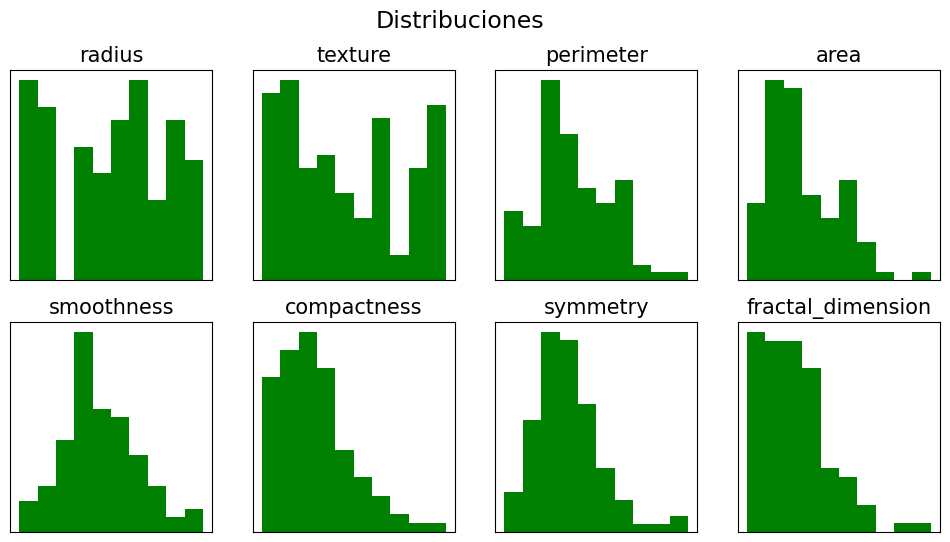

In [8]:
figure, axis = plt.subplots(2, 4, figsize=(12, 6))
axis = axis.flatten()
i = 0

for col in ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']:
    axis[i].hist(data_set[col], bins=10, color='g')
    axis[i].title.set_text(col)
    axis[i].title.set_fontsize(15)
    axis[i].set_xticks([])
    axis[i].set_yticks([])
    
    axis[i].tick_params(
    axis='both',          
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=False) 

    i += 1


figure.suptitle('Distribuciones', fontsize=17)

# plt.savefig('DistribucionesSinNormalizar.png', transparent=True, dpi=250, bbox_inches='tight')
plt.show()

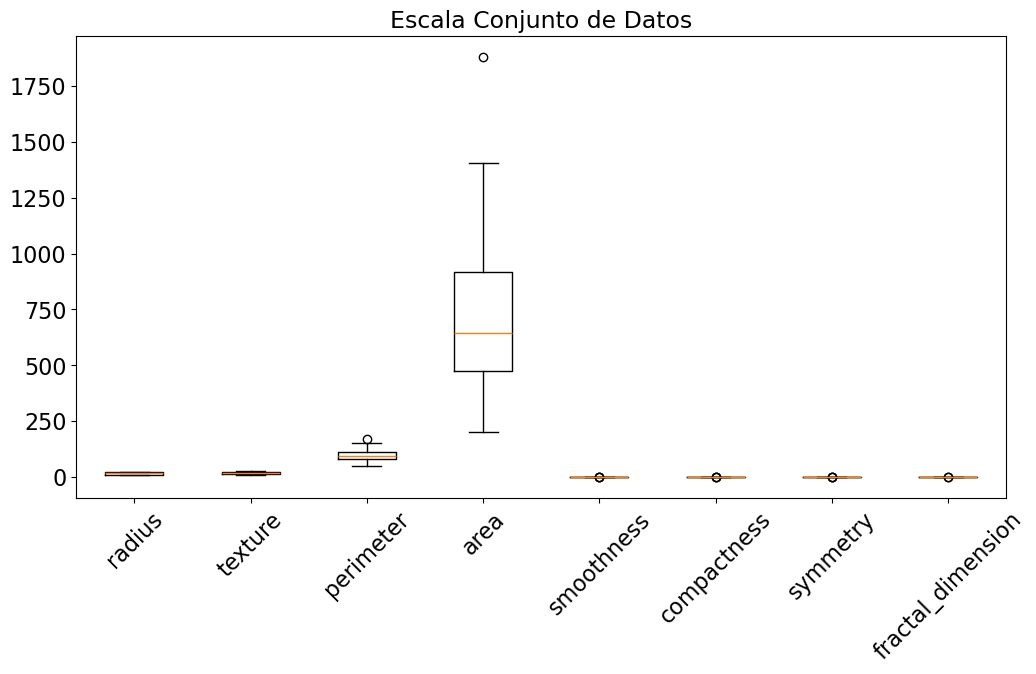

In [9]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
plt.boxplot(data_set)
ax.set_xticklabels(data_set.columns)
plt.title('Escala Conjunto de Datos', fontsize=17)

plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
           
# plt.savefig('sinNormalizar.png', transparent=True, dpi=250, bbox_inches='tight')
plt.show()

## Normalización μ - σ

In [11]:
stats = dict()
normalized = data_set.copy()

for col in ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']:
    stats[col] = (normalized[col].mean(), normalized[col].std())  # para cada columna, media y desviacion estandar

for col, values in stats.items():
    normalized[col] = normalized[col].apply((lambda x: (x - values[0]) / values[1]))

In [12]:
stats

{'radius': (16.85, 4.879093722768149),
 'texture': (18.23, 5.192953656327742),
 'perimeter': (96.78, 23.67608860680268),
 'area': (702.88, 319.7108946558064),
 'smoothness': (0.10273000000000002, 0.014641752254798919),
 'compactness': (0.1267, 0.06114356346775475),
 'symmetry': (0.19317000000000004, 0.030785033422562377),
 'fractal_dimension': (0.06469, 0.008150968214162219)}

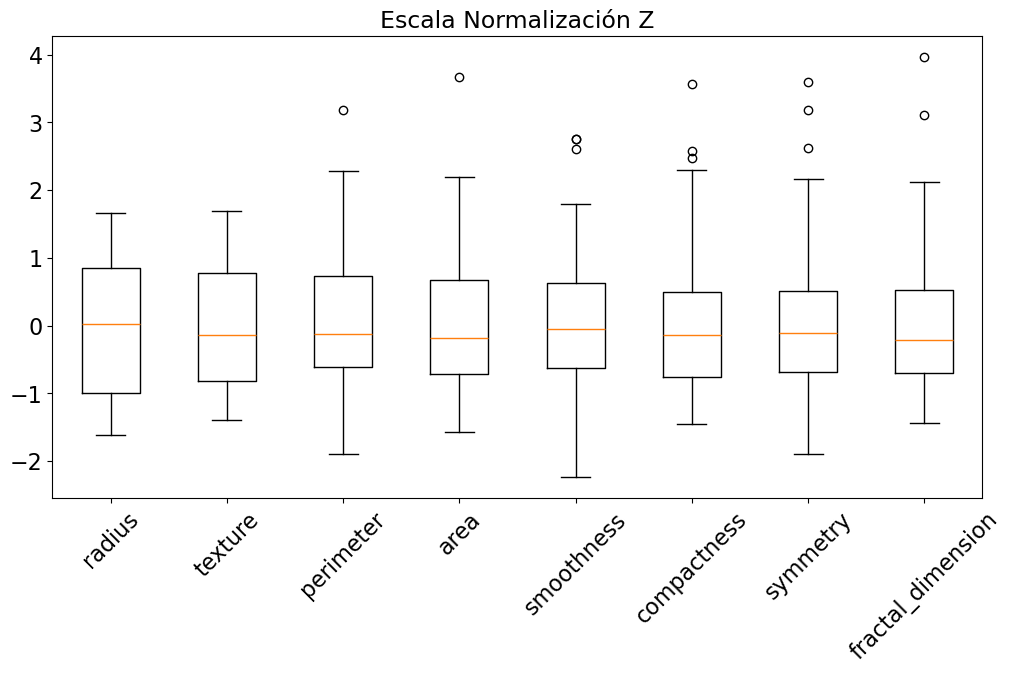

In [13]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
plt.boxplot(normalized)
ax.set_xticklabels(normalized.columns)

plt.title('Escala Normalización Z', fontsize=17)

plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

# plt.savefig('mu-sigma.png', transparent=True, dpi=250, bbox_inches='tight')
plt.show()

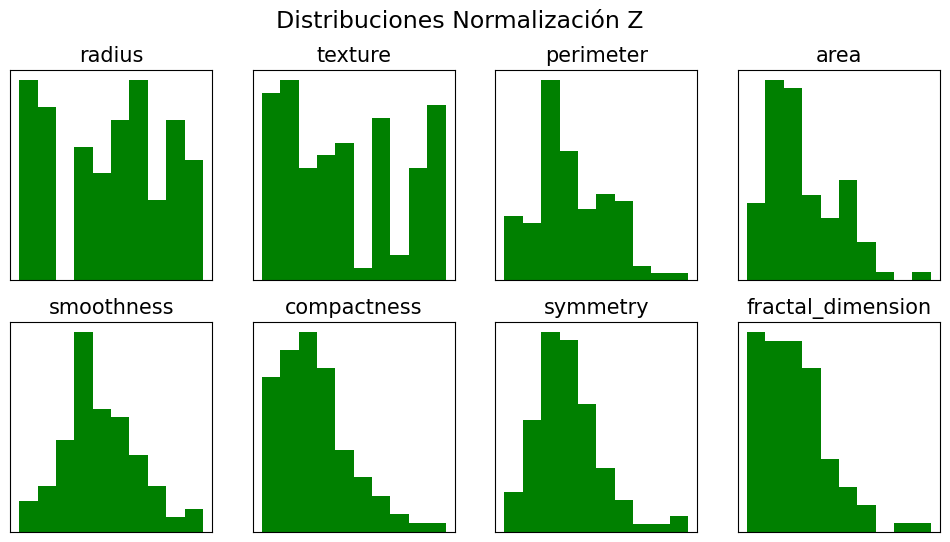

In [14]:
figure, axis = plt.subplots(2, 4, figsize=(12, 6))
axis = axis.flatten()
i = 0

for col in ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']:
    axis[i].hist(normalized[col], bins=10, color='g')
    axis[i].title.set_text(col)
    axis[i].title.set_fontsize(15)
    axis[i].set_xticks([])
    axis[i].set_yticks([])
    
    axis[i].tick_params(
    axis='both',          
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=False) 

    i += 1


figure.suptitle('Distribuciones Normalización Z', fontsize=17)

# plt.savefig('DistribucionesZ.png', transparent=True, dpi=250, bbox_inches='tight')
plt.show()

## Normalización [0, 1]

In [16]:
stats = dict()
normalized01 = data_set.copy()

for col in ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']:
    stats[col] = (normalized01[col].max(), normalized01[col].min())  # para cada columna, máximo y mínimo


In [17]:
print(stats)

{'radius': (25, 9), 'texture': (27, 11), 'perimeter': (172, 52), 'area': (1878, 202), 'smoothness': (0.143, 0.07), 'compactness': (0.345, 0.038), 'symmetry': (0.304, 0.135), 'fractal_dimension': (0.097, 0.053)}


In [18]:
for col, values in stats.items():
    normalized01[col] = normalized01[col].apply((lambda x: (x - values[1]) / (values[0] - values[1])))

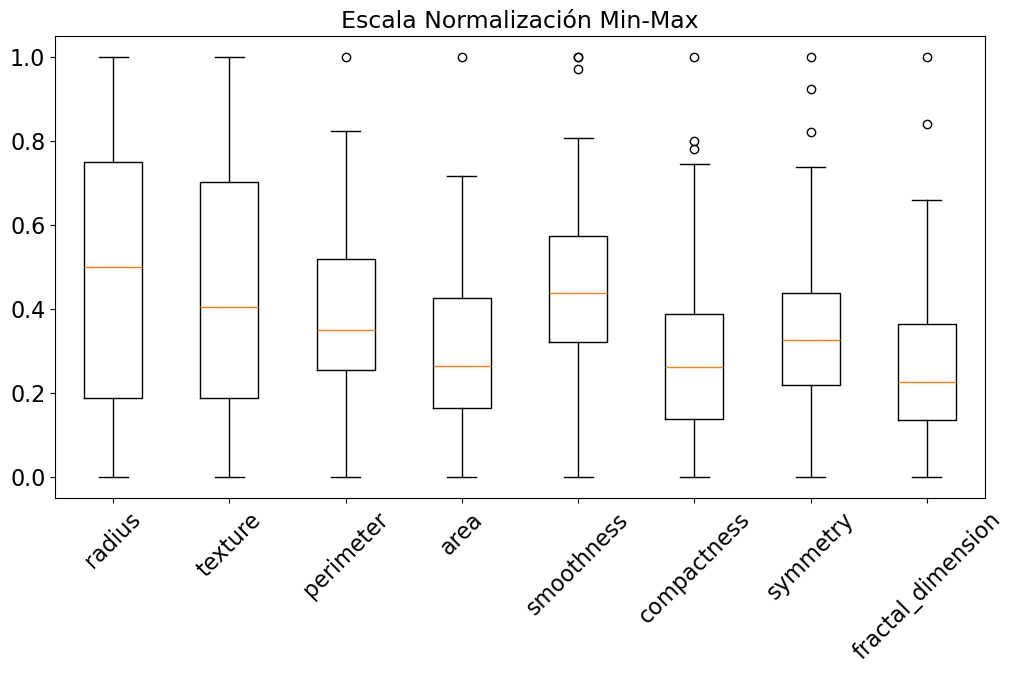

In [19]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
plt.boxplot(normalized01)
ax.set_xticklabels(normalized01.columns)

plt.title('Escala Normalización Min-Max', fontsize=17)

plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

# plt.savefig('0-1.png', transparent=True, dpi=250, bbox_inches='tight')
plt.show()

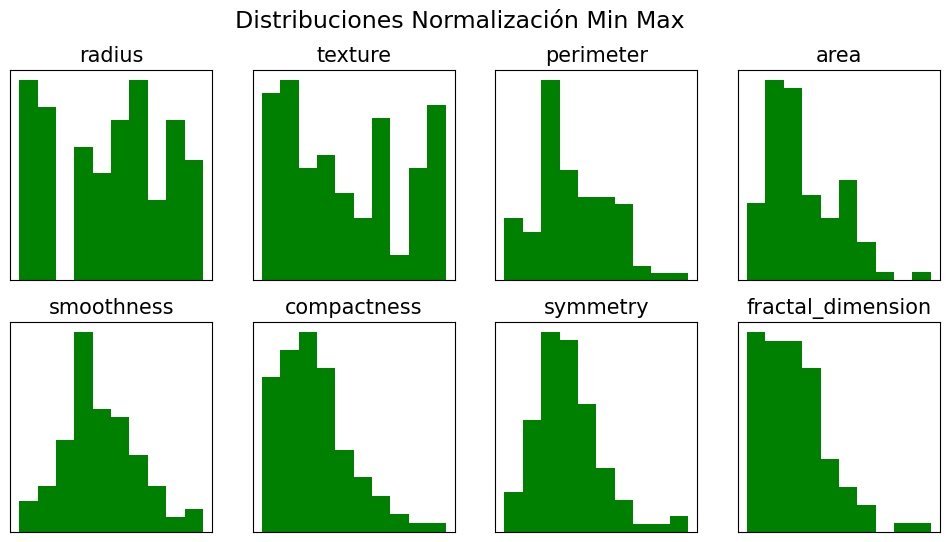

In [20]:
figure, axis = plt.subplots(2, 4, squeeze=True, figsize=(12, 6))
axis = axis.flatten()
i = 0

for col in ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']:
    axis[i].hist(normalized01[col], bins=10, color='g')
    axis[i].title.set_text(col)
    axis[i].title.set_fontsize(15)
    axis[i].set_xticks([])
    axis[i].set_yticks([])
    
    axis[i].tick_params(
    axis='both',          
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=False) 

    i += 1


figure.suptitle('Distribuciones Normalización Min Max', fontsize=17)

# plt.savefig('DistribucionesMinMax.png', transparent=True, dpi=250, bbox_inches='tight')
plt.show()

## Correlaciones

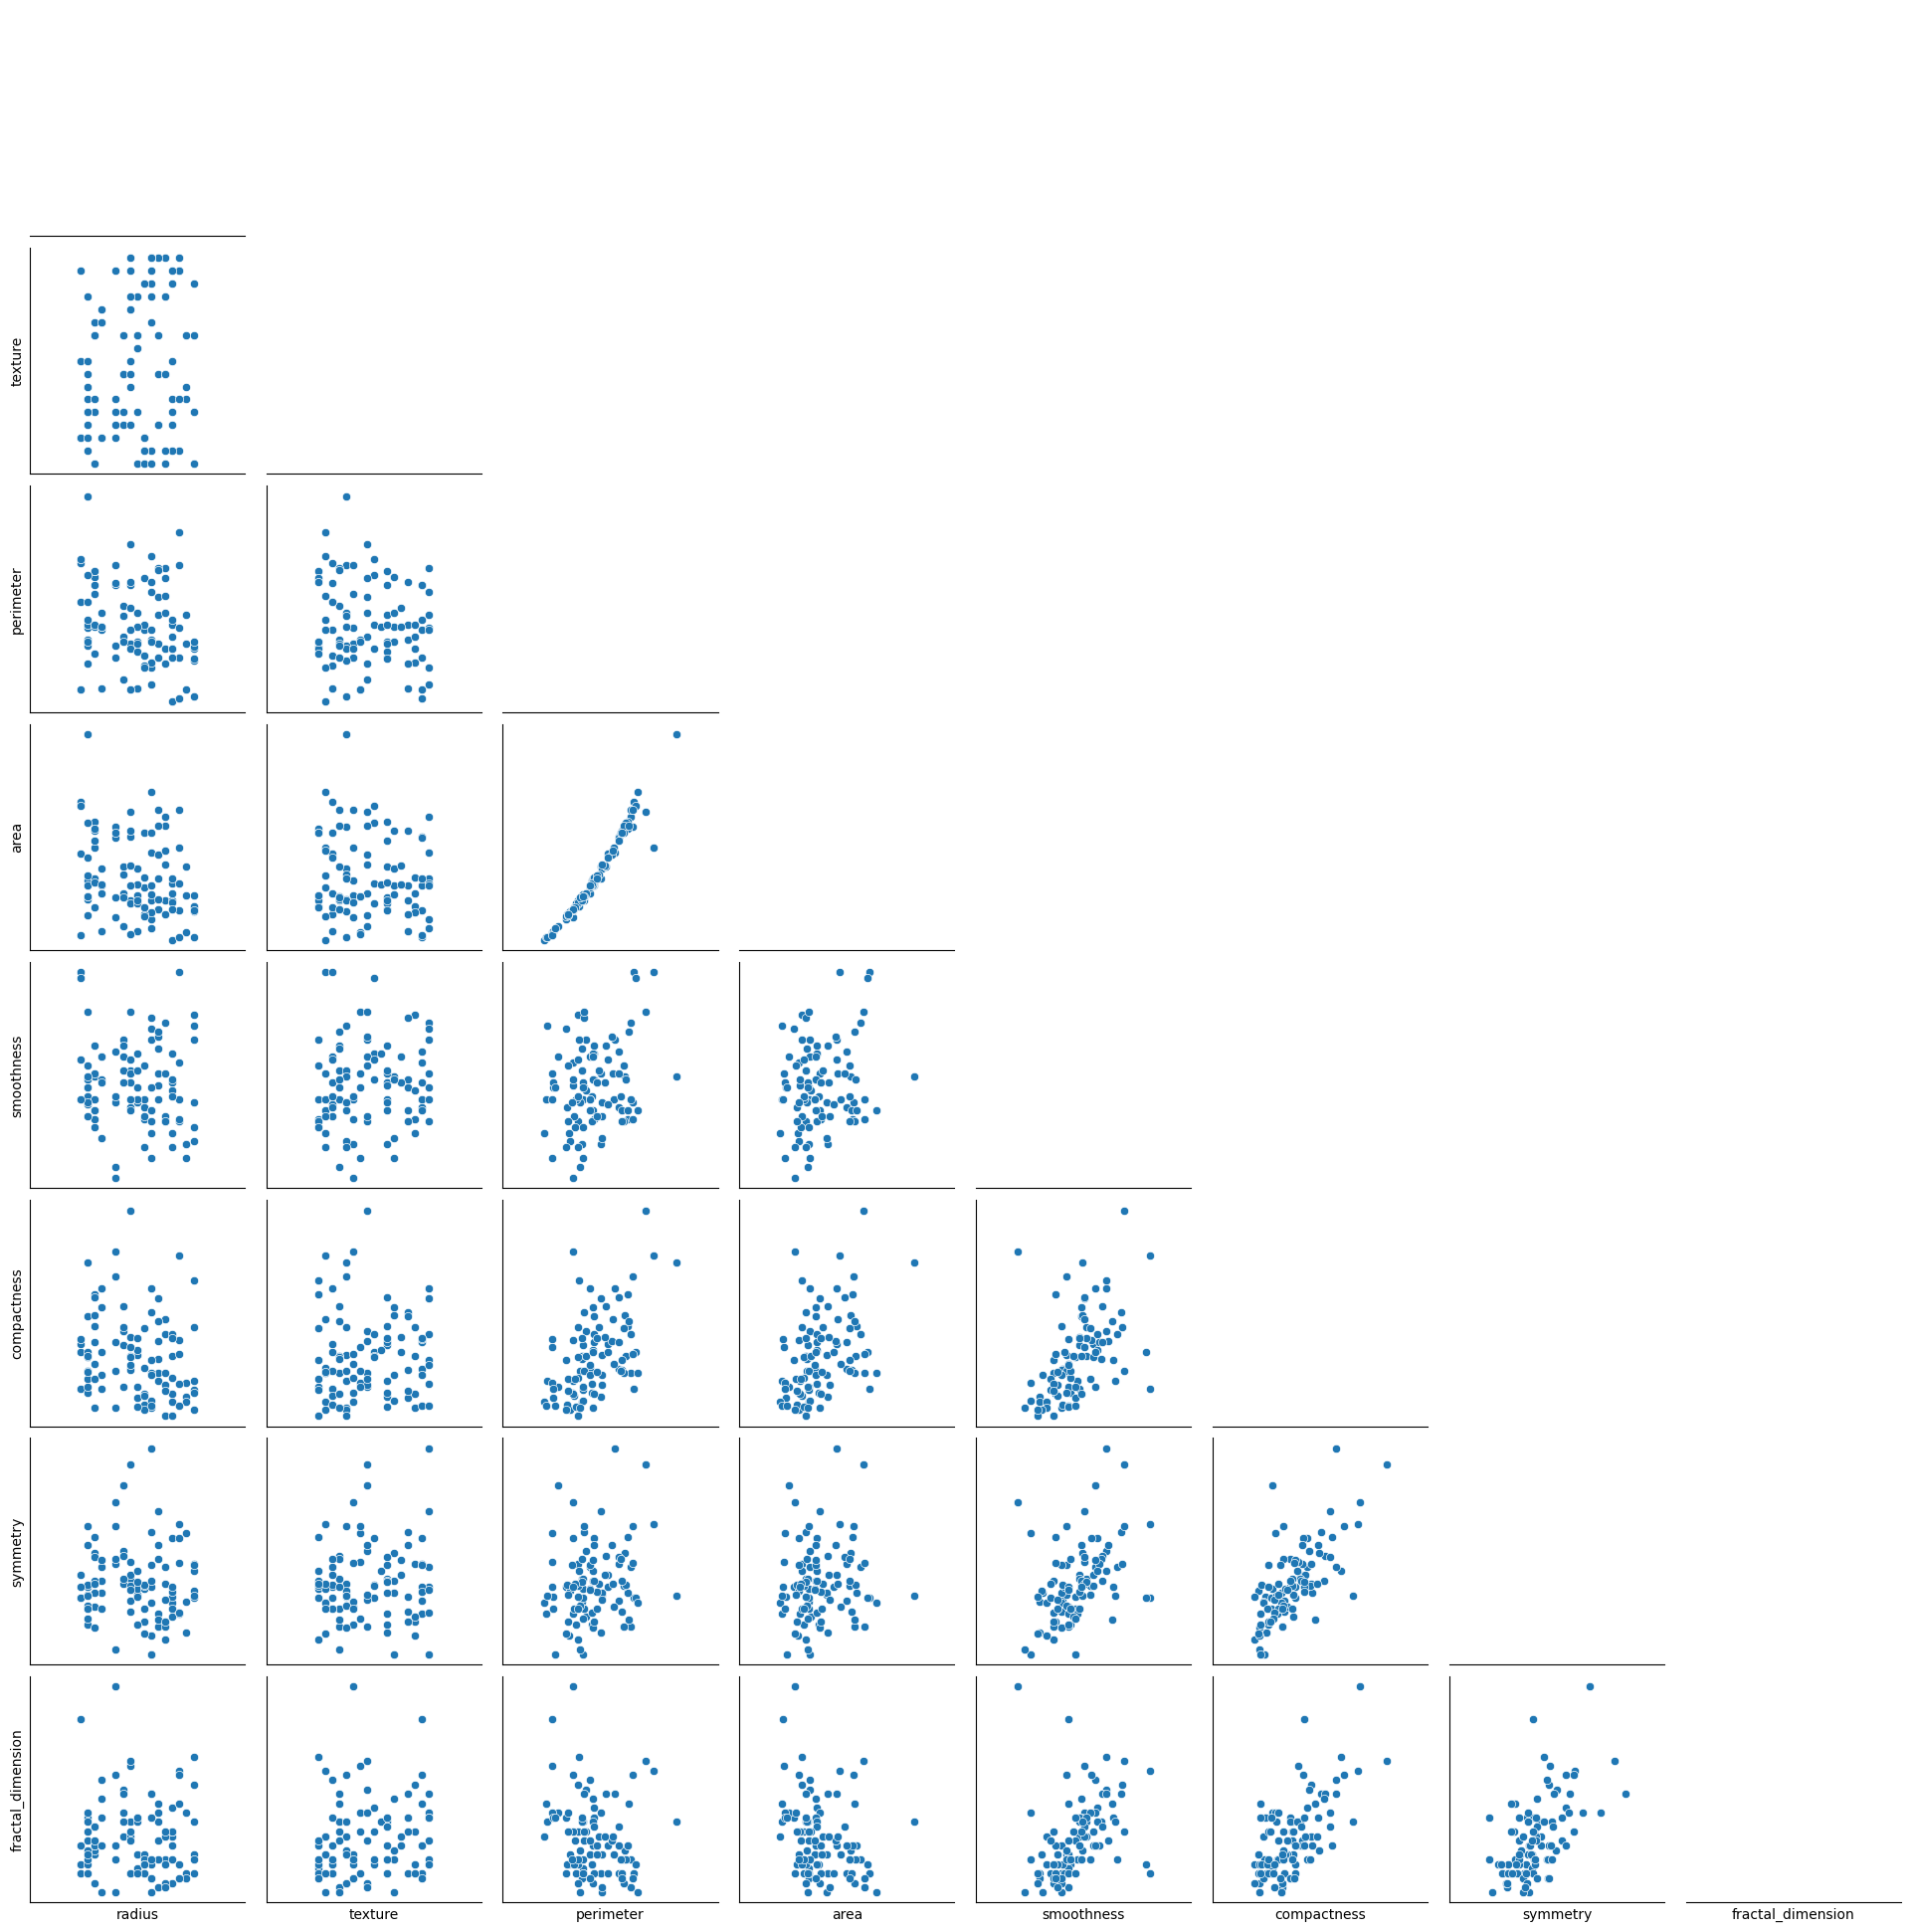

In [22]:
# sb.set(font_scale=1.8)

# Crear el pairplot
plot = sb.pairplot(data_set, corner=True, diag_kind="kde", diag_kws={"linewidth": 0, "fill": False})


for ax in plot.axes.flatten():
    if ax is not None:  # Verificar que ax no sea None
        ax.set_xticks([])  # Eliminar xticks
        ax.set_yticks([])  # Eliminar yticks

plt.show()

#### Sin Normalizar

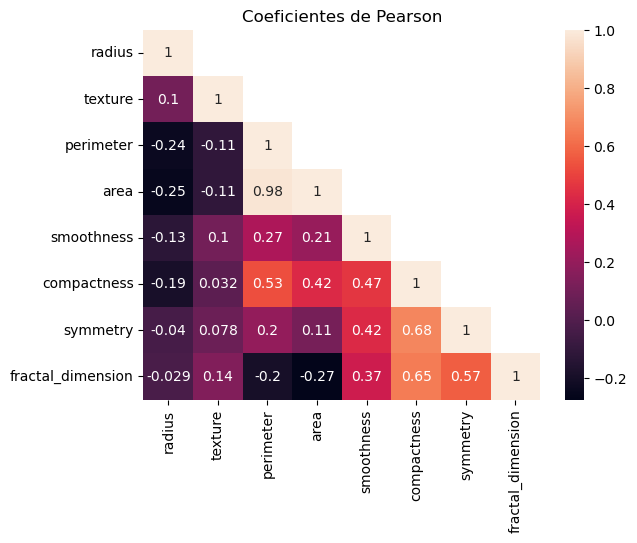

In [24]:
corr = data_set.corr()
mask = np.triu(corr)
np.fill_diagonal(mask, 0)

plt.figure() 
s = sb.heatmap(corr, annot=True, mask=mask).set_title('Coeficientes de Pearson')

plt.show()

In [25]:
data_set_simp = data_set.copy()
del data_set_simp['radius']
del data_set_simp['texture']
del data_set_simp['perimeter']

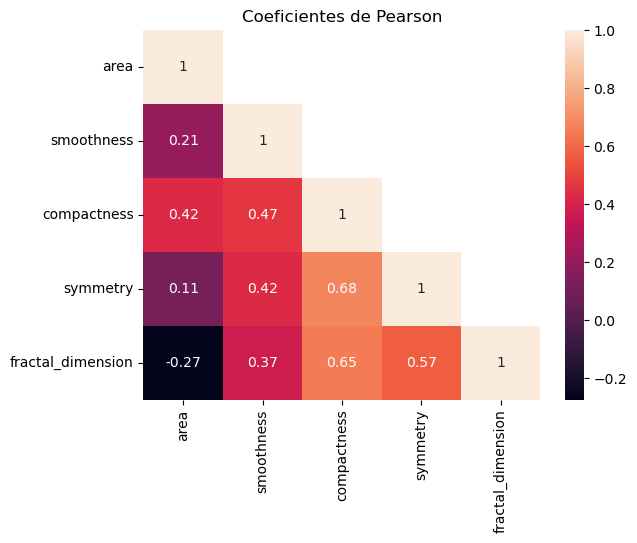

In [26]:
corr = data_set_simp.corr()
mask = np.triu(corr)
np.fill_diagonal(mask, 0)

plt.figure() 
s = sb.heatmap(corr, annot=True, mask=mask).set_title('Coeficientes de Pearson')

plt.show()

#### Normalización Z

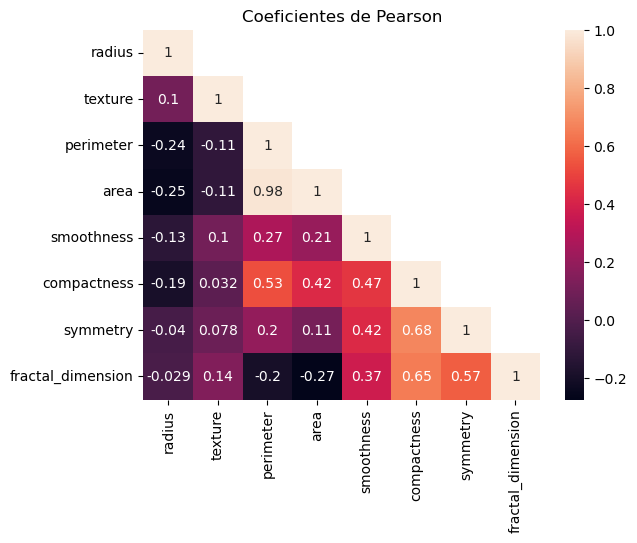

In [28]:
corr = normalized.corr()
mask = np.triu(corr)
np.fill_diagonal(mask, 0)

plt.figure()

s = sb.heatmap(corr, annot=True, mask=mask).set_title('Coeficientes de Pearson')

plt.show()

In [29]:
normalized_simp = normalized.copy()

del normalized_simp['radius']
del normalized_simp['texture']
del normalized_simp['perimeter'] # = area

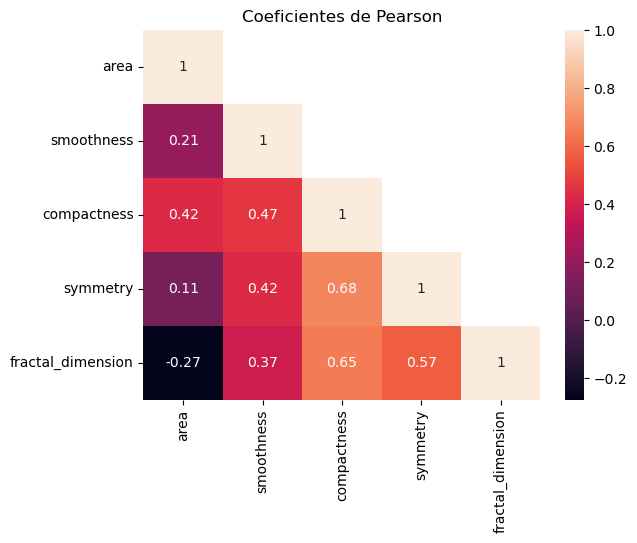

In [30]:
corr = normalized_simp.corr()
mask = np.triu(corr)
np.fill_diagonal(mask, 0)

plt.figure() 
s = sb.heatmap(corr, annot=True, mask=mask).set_title('Coeficientes de Pearson')

plt.show()

#### Normalización Min-Max

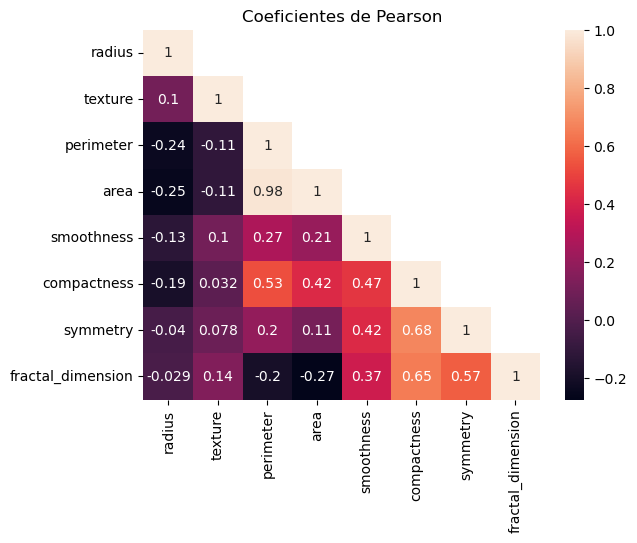

In [32]:
corr = normalized01.corr()
mask = np.triu(corr)
np.fill_diagonal(mask, 0)

plt.figure()

s = sb.heatmap(corr, annot=True, mask=mask).set_title('Coeficientes de Pearson')

plt.show()

In [33]:
normalized01_simp = normalized01.copy()

del normalized01_simp['radius']
del normalized01_simp['texture']
del normalized01_simp['perimeter'] # = area

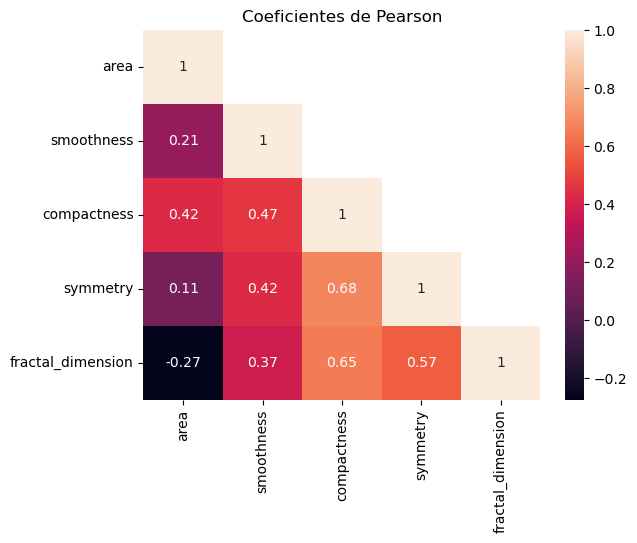

In [34]:
corr = normalized01_simp.corr()
mask = np.triu(corr)
np.fill_diagonal(mask, 0)

plt.figure() 
s = sb.heatmap(corr, annot=True, mask=mask).set_title('Coeficientes de Pearson')

plt.show()

## Código Modelos

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Regresión logística

In [38]:
from sklearn.linear_model import LogisticRegression

from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def logistic(train_ds, train_ds_y, test_ds, test_ds_y, prt=False):
    logisticRegr = LogisticRegression() # max_iter=10000)  # (max_iter=1000, tol=1e-50, verbose=True) 
    logisticRegr.fit(train_ds, train_ds_y)
    
    y_pred = logisticRegr.predict(test_ds)
    acc = accuracy_score(test_ds_y, y_pred)
    confM = confusion_matrix(test_ds_y, y_pred)

    if prt:
        print("Predición Regresión logística: ", y_pred)
        print("\tPrecisión Regresión logística: ", acc, end='\n\n')
    
    return logisticRegr, y_pred, acc, confM

### Árbol de decisión

In [40]:
from sklearn.tree import DecisionTreeClassifier

def decision_model(train_ds, train_ds_y, test_ds, test_ds_y, prt=False):
    dt = DecisionTreeClassifier()
    dt.fit(train_ds, train_ds_y)
    
    y_pred = dt.predict(test_ds)
    acc =  accuracy_score(test_ds_y, y_pred)
    confM = confusion_matrix(test_ds_y, y_pred)

    if prt:
        print("Predición árbol de decisión: ", y_pred)
        print("\tPrecisión árbol de decisión", acc, end='\n\n')
    
    return dt, y_pred, acc, confM

### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

def random_forest(train_ds, train_ds_y, test_ds, test_ds_y, prt=False):
    rf = RandomForestClassifier(n_estimators=100, random_state=np.random.RandomState())
    rf.fit(train_ds, train_ds_y)
    
    y_pred = rf.predict(test_ds)
    acc = accuracy_score(test_ds_y, y_pred)
    confM = confusion_matrix(test_ds_y, y_pred)
    
    if prt:
        print("Predición Random forest: ", y_pred)
        print("\tPrecisión Random Forest", acc, end='\n\n')
    
    return rf, y_pred, acc, confM

### K-Vecinos

In [44]:
from sklearn.neighbors import KNeighborsClassifier

def KNneighbors(train_ds, train_ds_y, test_ds, test_ds_y, prt=False):

    err = []
    acc = []

    for i in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors=i)  # p = 1
        knn.fit(train_ds, train_ds_y)
        y_pred = knn.predict(test_ds)
        acc.append(accuracy_score(test_ds_y, y_pred))
        err.append(np.mean(y_pred != test_ds_y))  # error es igual (# mal predichos) / (# total)

    num_neighbors = err.index(min(err)) + 1
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)  # p = 1
    knn.fit(train_ds, train_ds_y)

    y_pred = knn.predict(test_ds)
    accs = accuracy_score(test_ds_y, y_pred)
    confM = confusion_matrix(test_ds_y, y_pred)

    if prt:
        # plot_error_kneigh(err, acc)
        print("Predición K vecinos: ", y_pred)
        print("\tSe han seleccionado", num_neighbors, "vecinos.")
        print("\tPrecisión K vecinos", accs, end='\n\n')

    
    return knn, y_pred, accs, confM

In [45]:
def plot_error_kneigh(error_rate, acc):
    # plt.figure(figsize=(10,6))
    plt.plot(range(1,21), error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
    plt.title('Tasa de Error - K')
    plt.xlabel('K')
    plt.ylabel('Tasa de error')
    plt.show()

    # plt.figure(figsize=(10,6))
    plt.plot(range(1,21), acc, color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
    plt.title('Precisión - K')
    plt.xlabel('K')
    plt.ylabel('Precisión')
    plt.show()

### SVM

In [47]:
from sklearn import svm

def SVM(train_ds, train_ds_y, test_ds, test_ds_y, prt=False):

    svm_mod = svm.SVC(kernel='linear')
    svm_mod.fit(train_ds, train_ds_y)
    
    y_pred = svm_mod.predict(test_ds)
    acc = accuracy_score(test_ds_y, y_pred)
    confM = confusion_matrix(test_ds_y, y_pred)

    if prt:
        print("Predición SVM: ", y_pred)
        print("\tPrecisión SVM ", acc, end='\n\n')
    
    return svm_mod, y_pred, acc, confM

### Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB

def NB(train_ds, train_ds_y, test_ds, test_ds_y, prt=False):

    NB_mod = GaussianNB()
    NB_mod.fit(train_ds, train_ds_y)
    
    y_pred = NB_mod.predict(test_ds)
    acc = accuracy_score(test_ds_y, y_pred)
    confM = confusion_matrix(test_ds_y, y_pred)

    if prt:
        print("Predición Naive Bayes: ", y_pred)
        print("\tPrecisión Naive Bayes ", acc, end='\n\n')
    
    return NB_mod, y_pred, acc, confM

### ANN

In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPClassifier

def ANN(train_ds, train_ds_y, test_ds, test_ds_y, prt=False):
    mlp = MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='logistic', solver='lbfgs', max_iter=10000)
    mlp.fit(train_ds, train_ds_y)

    y_pred = mlp.predict(test_ds)
    acc = accuracy_score(test_ds_y, y_pred)
    confM = confusion_matrix(test_ds_y, y_pred)

    if prt:
        print("Predición ANN: ", y_pred)
        print("\tPrecisión ANN ", acc, end='\n\n')
    
    return mlp, y_pred, acc, confM

### RNN

In [53]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix

def RNN(train_ds, train_ds_y, test_ds, test_ds_y, prt=False):
    
    train_ds = np.array(train_ds)
    train_ds_y = np.array(train_ds_y)
    test_ds = np.array(test_ds)
    test_ds_y = np.array(test_ds_y)
    train_ds = train_ds.reshape((train_ds.shape[0], 1, train_ds.shape[1]))
    test_ds = test_ds.reshape((test_ds.shape[0], 1, test_ds.shape[1]))

    # construcción del modelo
    model = Sequential()
    model.add(SimpleRNN(64, activation='tanh', input_shape=(1, train_ds.shape[2])))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(train_ds, train_ds_y, epochs=300, batch_size=32, verbose=0)

    # Realizamos predicciones
    y_pred_aux = model.predict(test_ds)
    y_pred_aux = (y_pred_aux > 0.5).astype(int)

    y_pred = [pred[0] for pred in y_pred_aux]
    
    acc = accuracy_score(test_ds_y, y_pred)
    confM = confusion_matrix(test_ds_y, y_pred)

    if prt:
        print("Predición RNN: ", y_pred)
        print("\tPrecisión RNN ", acc, end='\n\n')

    return model, y_pred, acc, confM

### Separación del conjunto de datos

In [55]:
rand_seed = 2088553616

def split_dataset(dataset, frac=0.80):
    aux = dataset.copy()
    aux['result'] = results
    train_dataset = aux.sample(frac=frac, random_state=rand_seed)
    test_dataset = aux.drop(train_dataset.index)

    del aux['result']
    train_dataset_y = train_dataset['result']
    del train_dataset['result']
    test_dataset_y = test_dataset['result']
    del test_dataset['result']

    return train_dataset, train_dataset_y, test_dataset, test_dataset_y

In [56]:
datasets_total = split_dataset(data_set)
datasets_total_simp = split_dataset(data_set_simp)

datasets_normalized = split_dataset(normalized)
datasets_normalized_simp = split_dataset(normalized_simp)

datasets_01 = split_dataset(normalized01)
datasets_01_simp = split_dataset(normalized01_simp)

## Elección del Conjunto de Datos

### Entrenamiento Modelos

In [59]:
models_names = ["Logistic", "Decision tree", "Random Forest", "K-vecinos"]

#### Sin normalizar

In [102]:
log_model = logistic(*datasets_total)
dec_model = decision_model(*datasets_total)
rf_model = random_forest(*datasets_total)
k_model = KNneighbors(*datasets_total)

models_total = dict(zip(models_names, [log_model[0], dec_model[0], rf_model[0], k_model[0]]))
predictions_total = [log_model[1], dec_model[1], rf_model[1], k_model[1]]
acc_total = [log_model[2], dec_model[2], rf_model[2], k_model[2]]
conf_total = dict(zip(models_names, [log_model[3], dec_model[3], rf_model[3], k_model[3]]))

#### Sin normalizar simplificado

In [105]:
log_model = logistic(*datasets_total_simp)
dec_model = decision_model(*datasets_total_simp)
rf_model = random_forest(*datasets_total_simp)
k_model = KNneighbors(*datasets_total_simp)

models_total_simp = dict(zip(models_names, [log_model[0], dec_model[0], rf_model[0], k_model[0]]))
predictions_total_simp = [log_model[1], dec_model[1], rf_model[1], k_model[1]]
acc_total_simp = [log_model[2], dec_model[2], rf_model[2], k_model[2]]
conf_total_simp = dict(zip(models_names, [log_model[3], dec_model[3], rf_model[3], k_model[3]]))

#### Normalización Z

In [108]:
log_model = logistic(*datasets_normalized)
dec_model = decision_model(*datasets_normalized)
rf_model = random_forest(*datasets_normalized)
k_model = KNneighbors(*datasets_normalized)

models_normalized = dict(zip(models_names, [log_model[0], dec_model[0], rf_model[0], k_model[0]]))
predictions_normalized = [log_model[1], dec_model[1], rf_model[1], k_model[1]]
acc_normalized = [log_model[2], dec_model[2], rf_model[2], k_model[2]]
conf_normalized = dict(zip(models_names, [log_model[3], dec_model[3], rf_model[3], k_model[3]]))

#### Normalización Z simplificada

In [111]:
log_model = logistic(*datasets_normalized_simp)
dec_model = decision_model(*datasets_normalized_simp)
rf_model = random_forest(*datasets_normalized_simp)
k_model = KNneighbors(*datasets_normalized_simp)

models_normalized_simp = dict(zip(models_names, [log_model[0], dec_model[0], rf_model[0], k_model[0]]))
predictions_normalized_simp = [log_model[1], dec_model[1], rf_model[1], k_model[1]]
acc_normalized_simp = [log_model[2], dec_model[2], rf_model[2], k_model[2]]
conf_normalized_simp = dict(zip(models_names, [log_model[3], dec_model[3], rf_model[3], k_model[3]]))

#### Normalización Min Max

In [114]:
log_model = logistic(*datasets_01)
dec_model = decision_model(*datasets_01)
rf_model = random_forest(*datasets_01)
k_model = KNneighbors(*datasets_01)

models_01 = dict(zip(models_names, [log_model[0], dec_model[0], rf_model[0], k_model[0]]))
predictions_01 = [log_model[1], dec_model[1], rf_model[1], k_model[1]]
acc_01 = [log_model[2], dec_model[2], rf_model[2], k_model[2]]
conf_01 = dict(zip(models_names, [log_model[3], dec_model[3], rf_model[3], k_model[3]]))

#### Normalización Min Max simplificada

In [117]:
log_model = logistic(*datasets_01_simp)
dec_model = decision_model(*datasets_01_simp)
rf_model = random_forest(*datasets_01_simp)
k_model = KNneighbors(*datasets_01_simp)

models_01_simp = dict(zip(models_names, [log_model[0], dec_model[0], rf_model[0], k_model[0]]))
predictions_01_simp = [log_model[1], dec_model[1], rf_model[1], k_model[1]]
acc_01_simp = [log_model[2], dec_model[2], rf_model[2], k_model[2]]
conf_01_simp =dict(zip(models_names, [log_model[3], dec_model[3], rf_model[3], k_model[3]]))

### Validación cruzada

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [123]:
@ignore_warnings(category=ConvergenceWarning)
def cross_validation(models, dataset, dataset_y, medias, cv=5):

    kf = KFold(n_splits=cv, shuffle=True, random_state=np.random.randint(2**32 -2))  

    
    for mod in models:
        scores = cross_val_score(mod[1], dataset, dataset_y, cv=kf)
        if mod[0] in medias:
            medias[mod[0]].append(scores)
        else:
            medias[mod[0]] = [scores]

In [125]:
medias = {}
modelos = [models_total, models_total_simp, models_normalized, models_normalized_simp, models_01_simp, models_01_simp]
datasets_t = [data_set, data_set_simp, normalized, normalized_simp, normalized01, normalized01_simp]
nombres = ['Total', 'Total Simp', 'Normalización Z', 'Normalización Z Simp', 'Normalización Min Max', 'Normalización Min Max Simp']

resultados = []

for i in range(len(modelos)):
    

    modd = modelos[i]
    tt = datasets_t[i]
    
    modelsYnames = []
    for key, value in modd.items():
        modelsYnames.append((key, value))

    for nn in range(150):
        cross_validation(modelsYnames, tt, results, medias)

    media_modelos = {}

    for key, values in medias.items():
        m = 0
        for l in values:
            m += l.mean()
        m = m / len(values)

        
        media_modelos[key] = m

    resultados.append(media_modelos)
    print(nombres[i])
    print('\t', media_modelos)

Total
	 {'Logistic': 0.8272666666666659, 'Decision tree': 0.7700666666666668, 'Random Forest': 0.828533333333333, 'K-vecinos': 0.7958}
Total Simp
	 {'Logistic': 0.8224000000000005, 'Decision tree': 0.7874333333333342, 'Random Forest': 0.8338666666666682, 'K-vecinos': 0.797200000000001}
Normalización Z
	 {'Logistic': 0.8298666666666668, 'Decision tree': 0.7828444444444449, 'Random Forest': 0.8325999999999998, 'K-vecinos': 0.7970000000000013}
Normalización Z Simp
	 {'Logistic': 0.8350000000000003, 'Decision tree': 0.7879833333333337, 'Random Forest': 0.8343333333333324, 'K-vecinos': 0.8070333333333339}
Normalización Min Max
	 {'Logistic': 0.8381200000000024, 'Decision tree': 0.7840933333333321, 'Random Forest': 0.8338800000000032, 'K-vecinos': 0.8093466666666684}
Normalización Min Max Simp
	 {'Logistic': 0.8349000000000036, 'Decision tree': 0.7873777777777765, 'Random Forest': 0.834577777777783, 'K-vecinos': 0.8122222222222262}


In [127]:
cv_total = list(resultados[0].values())
cv_total_simp = list(resultados[1].values())

cv_normalized = list(resultados[2].values())
cv_normalized_simp = list(resultados[3].values())

cv_01 = list(resultados[4].values())
cv_01_simp = list(resultados[5].values())

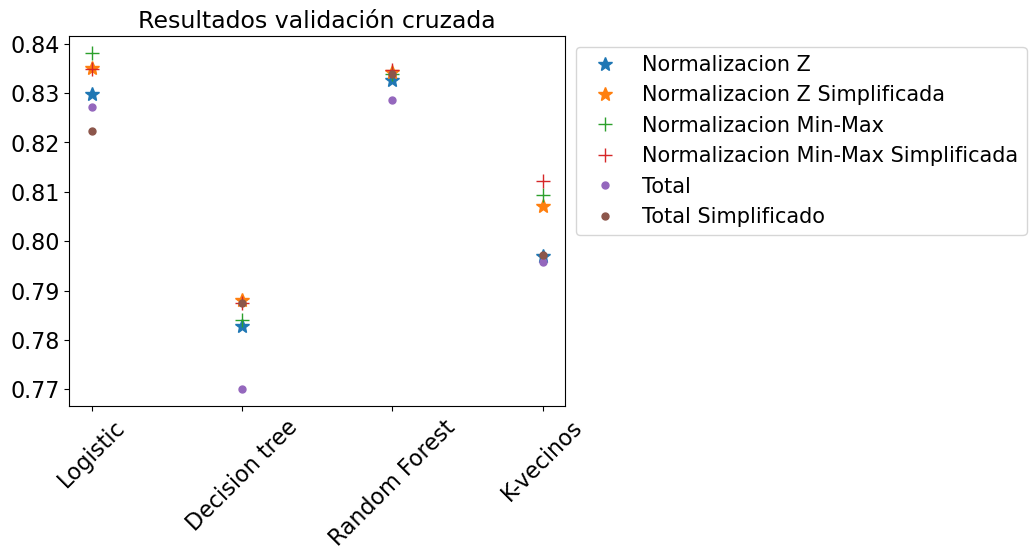

In [129]:
plt.plot(cv_normalized, '*', label='Normalizacion Z', markersize=10)
plt.plot(cv_normalized_simp, '*', label='Normalizacion Z Simplificada', markersize=10)

plt.plot(cv_01, '+', label='Normalizacion Min-Max', markersize=10)
plt.plot(cv_01_simp, '+', label='Normalizacion Min-Max Simplificada', markersize=10)

plt.plot(cv_total, '.', label = 'Total', markersize=10)
plt.plot(cv_total_simp, '.', label = 'Total Simplificado', markersize=10)

plt.xticks(range(4), models_names)


plt.yticks(fontsize=16)
plt.xticks(fontsize=16, rotation=45)

plt.title('Resultados validación cruzada', fontsize=17)

# plt.legend()
plt.legend(bbox_to_anchor=(1, 1), fontsize=15)
# plt.savefig('precisions.png', transparent=True, dpi=450, bbox_inches='tight')
plt.show()

#### Resultados memoria

**Los resultados que se han puesto en la memoria son los que se encuentran a continuación. Por la aleatorioedad de la división en el conjunto de datos es imposible replicar cada ve que se ejecuta el programa los mismos resultados. De todas formas, como se puede ver a continuación, los resultados son muy similares.**

In [133]:
cv_total = list(({'Logistic': 0.8260666666666658,
 'Decision tree': 0.7756666666666666,
 'Random Forest': 0.8275999999999997,
 'K-vecinos': 0.8046666666666669}).values())


cv_total_simp = list(({'Logistic': 0.8171333333333325,
 'Decision tree': 0.803066666666667,
 'Random Forest': 0.8393333333333327,
 'K-vecinos': 0.7924666666666668}).values())


cv_normalized = list(({'Logistic': 0.8259999999999995,
 'Decision tree': 0.7661333333333337,
 'Random Forest': 0.8263999999999992,
 'K-vecinos': 0.7947333333333333}).values())


cv_normalized_simp = list(({'Logistic': 0.8215999999999991,
 'Decision tree': 0.8026666666666664,
 'Random Forest': 0.8425999999999996,
 'K-vecinos': 0.8017333333333329}).values())


cv_01 = list(({'Logistic': 0.8534666666666664,
 'Decision tree': 0.7683333333333338,
 'Random Forest': 0.8313333333333331,
 'K-vecinos': 0.8085333333333335}).values())


cv_01_simp = list(({'Logistic': 0.8202666666666658,
 'Decision tree': 0.799,
 'Random Forest': 0.8381999999999994,
 'K-vecinos': 0.7812}).values())

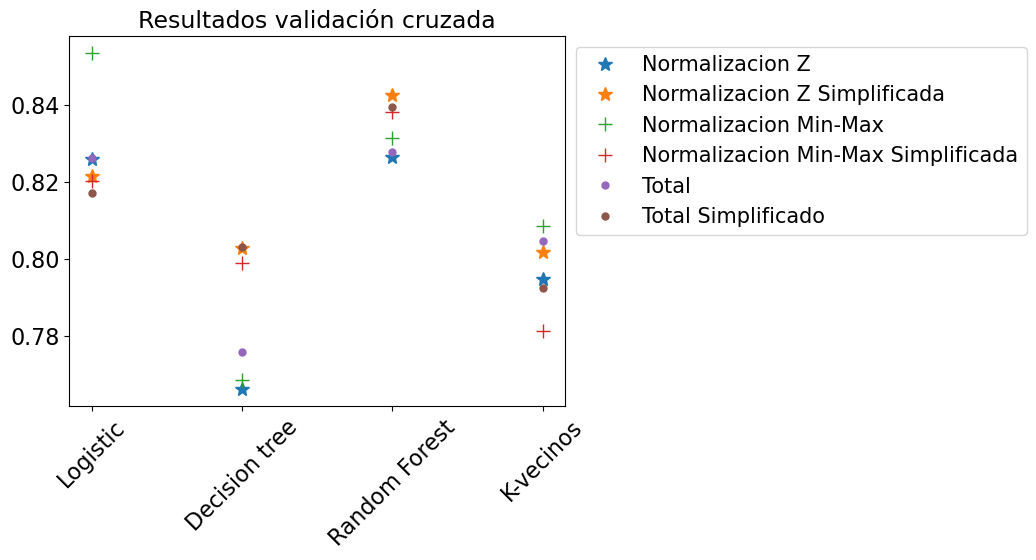

In [135]:
plt.plot(cv_normalized, '*', label='Normalizacion Z', markersize=10)
plt.plot(cv_normalized_simp, '*', label='Normalizacion Z Simplificada', markersize=10)

plt.plot(cv_01, '+', label='Normalizacion Min-Max', markersize=10)
plt.plot(cv_01_simp, '+', label='Normalizacion Min-Max Simplificada', markersize=10)

plt.plot(cv_total, '.', label = 'Total', markersize=10)
plt.plot(cv_total_simp, '.', label = 'Total Simplificado', markersize=10)

plt.xticks(range(4), models_names)


plt.yticks(fontsize=16)
plt.xticks(fontsize=16, rotation=45)

plt.title('Resultados validación cruzada', fontsize=17)

# plt.legend()
plt.legend(bbox_to_anchor=(1, 1), fontsize=15)
# plt.savefig('precisions.png', transparent=True, dpi=450, bbox_inches='tight')
plt.show()

## Evaluación modelos

### Entrenamiento modelos

**A la vista de los resultados anteriores, a partir de ahora, sólo se usará el conjunto de datos original, sin normalizar y simplificado**

In [188]:
datasets_total_simp = split_dataset(data_set_simp)

In [199]:
models_names = ["Logistic", "Decision tree", "Random Forest", "K-vecinos", "SVM", "Naive Bayes", "ANN", "RNN"]


dec_model = decision_model(*datasets_total_simp, True)
log_model = logistic(*datasets_total_simp, True)
rf_model = random_forest(*datasets_total_simp, True)
k_model = KNneighbors(*datasets_total_simp, True)

svm_model = SVM(*datasets_total_simp, True)
nb_model = NB(*datasets_total_simp, True)
ann_model = ANN(*datasets_total_simp, True)
rnn_model = RNN(*datasets_total_simp, True)

models_total_simp = dict(zip(models_names, [log_model[0], dec_model[0], rf_model[0], k_model[0], svm_model[0], nb_model[0], ann_model[0], rnn_model[0]]))
predictions_total_simp = dict(zip(models_names, [log_model[1], dec_model[1], rf_model[1], k_model[1], svm_model[1], nb_model[1], ann_model[1], rnn_model[1]]))
acc_total_simp = [log_model[2], dec_model[2], rf_model[2], k_model[2], svm_model[2], nb_model[2], ann_model[2], rnn_model[2]]
conf_total_simp = dict(zip(models_names, [log_model[3], dec_model[3], rf_model[3], k_model[3], svm_model[3], nb_model[3], ann_model[3], rnn_model[3]]))

Predición árbol de decisión:  [1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0]
	Precisión árbol de decisión 0.8

Predición Regresión logística:  [1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0]
	Precisión Regresión logística:  0.85

Predición Random forest:  [1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0]
	Precisión Random Forest 0.95

Predición K vecinos:  [1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0]
	Se han seleccionado 3 vecinos.
	Precisión K vecinos 0.9

Predición SVM:  [1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0]
	Precisión SVM  0.85

Predición Naive Bayes:  [1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0]
	Precisión Naive Bayes  0.8



Predición ANN:  [1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0]
	Precisión ANN  0.95

1/1 [==============================] - 0s 54ms/step
Predición RNN:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0]
	Precisión RNN  0.8



In [131]:
ann_model = ANN(*datasets_total_simp, True)

Predición ANN:  [1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0]
	Precisión ANN  0.9



In [144]:
dec_model = decision_model(*datasets_total_simp, True)

Predición árbol de decisión:  [1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0]
	Precisión árbol de decisión 0.8



In [146]:
models_total_simp = dict(zip(models_names, [log_model[0], dec_model[0], rf_model[0], k_model[0], svm_model[0], nb_model[0], ann_model[0], rnn_model[0]]))
predictions_total_simp = dict(zip(models_names, [log_model[1], dec_model[1], rf_model[1], k_model[1], svm_model[1], nb_model[1], ann_model[1], rnn_model[1]]))
# predictions_total_simp = [log_model[1], dec_model[1], rf_model[1], k_model[1], svm_model[1], nb_model[1], ann_model[1], rnn_model[1]]
acc_total_simp = [log_model[2], dec_model[2], rf_model[2], k_model[2], svm_model[2], nb_model[2], ann_model[2], rnn_model[2]]
conf_total_simp = dict(zip(models_names, [log_model[3], dec_model[3], rf_model[3], k_model[3], svm_model[3], nb_model[3], ann_model[3], rnn_model[3]]))

### Matrices de confusión

In [190]:
def print_conf_matrices(models, names):
    labels = ["Benigno", "Maligno"]
    
    figure, axis = plt.subplots(2, 2, figsize=(12, 12)) # , squeeze=True, )
    figure.tight_layout(pad=7.3)
    # plt.suptitle(name, fontsize=18)
    axis = axis.flatten()

    i = 0
    for key in names:
        value = models[key]
        disp = ConfusionMatrixDisplay(confusion_matrix=value, display_labels=labels)
        disp.plot(ax=axis[i], colorbar=False)
        axis[i].set_title(key, fontsize=17);     

        axis[i].xaxis.set_tick_params(labelsize=16)
        axis[i].yaxis.set_tick_params(labelsize=16)
        if i == 0:
            axis[i].set_xlabel('Predicted label', fontsize=15)
            axis[i].set_ylabel('True label', fontsize=15)

        else:
            axis[i].set_xlabel('', fontsize=0)
            axis[i].set_ylabel('', fontsize=0) 

        for text in disp.text_.ravel():
            text.set_fontsize(15)
        
        i += 1

    plt.show()

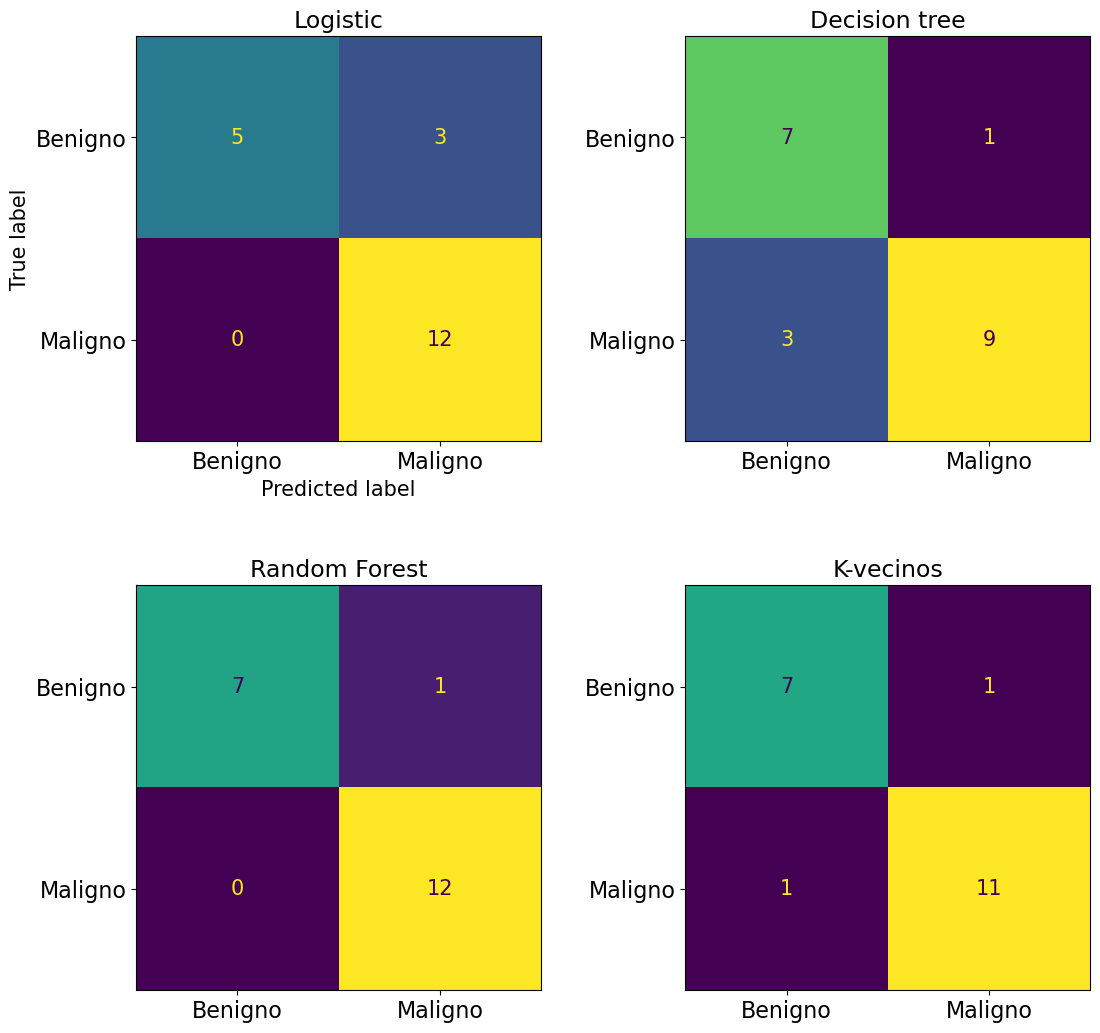

In [222]:
print_conf_matrices(conf_total_simp, ['Logistic', 'Decision tree', 'Random Forest', 'K-vecinos'])

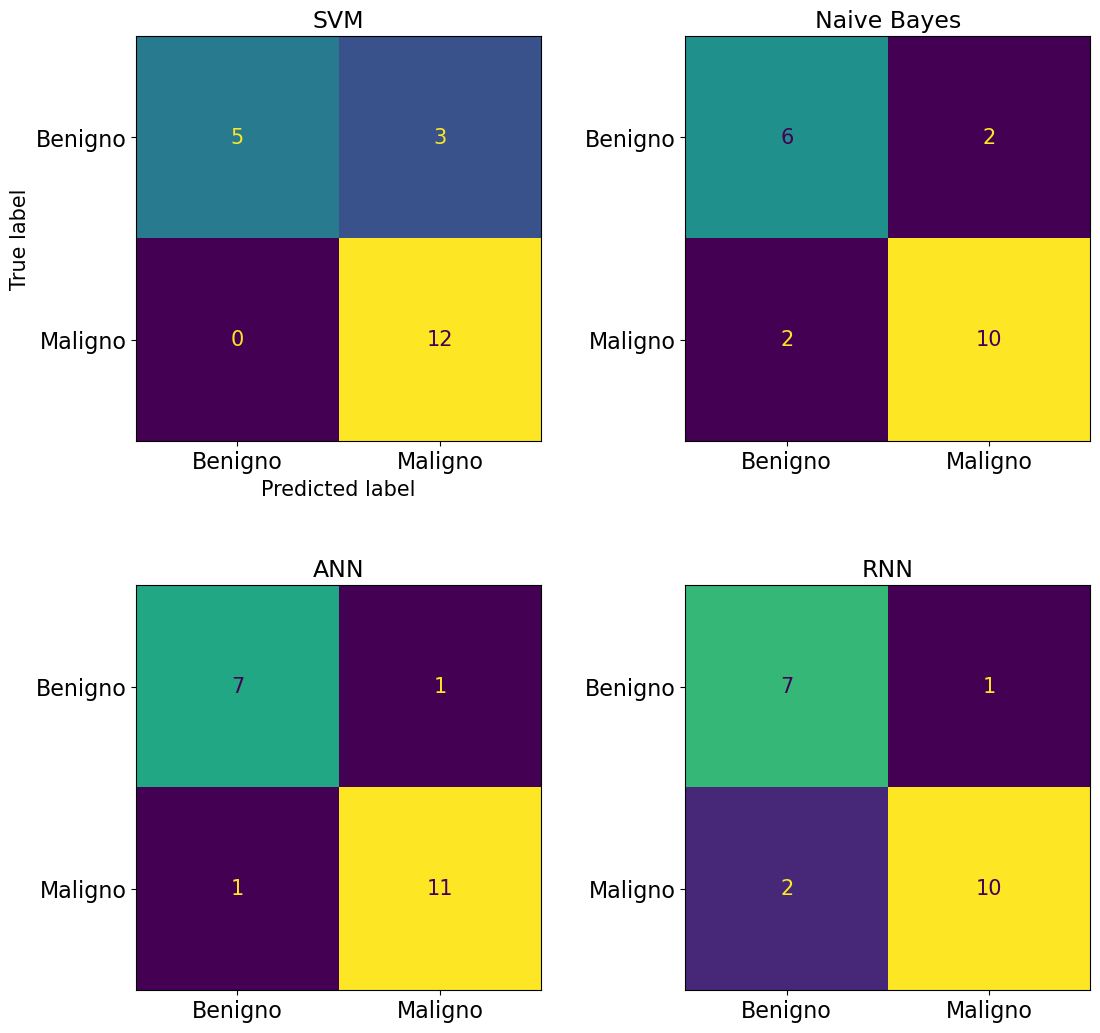

In [220]:
print_conf_matrices(conf_total_simp, ['SVM', 'Naive Bayes', 'ANN', 'RNN'])

### Métricas

In [158]:
from sklearn.metrics import classification_report

def print_test(prediction, dataset_test_y, model_name):

    print(model_name)
    print('\tPredicción', prediction)
    
    rep = classification_report(dataset_test_y, prediction, output_dict=True)    

    print("\t\tBenigno: \t\t Precisión: {},\t Sensibilidad: {},\t Puntuación F1: {},\t Número de muestras: {}".format(round(rep['0']['precision'], 3), round(rep['0']['recall'], 3), round(rep['0']['f1-score'], 3), rep['0']['support']))
    print("\t\tMaligno: \t\t Precisión: {},\t Sensibilidad: {},\t Puntuación F1: {},\t Número de muestras: {}".format(round(rep['1']['precision'], 3), round(rep['1']['recall'], 3), round(rep['1']['f1-score'], 3), rep['1']['support']))
    print("\t\tMedia ponderada: \t Precisión: {},\t Sensibilidad: {},\t Puntuación F1: {},\t Número de muestras: {}".format(round(rep['weighted avg']['precision'], 3), round(rep['weighted avg']['recall'], 3), round(rep['weighted avg']['f1-score'], 3), rep['weighted avg']['support']))


In [160]:
for name in  ['Logistic', 'Decision tree', 'Random Forest', 'K-vecinos', 'SVM', 'Naive Bayes', 'ANN', 'RNN']:
    print_test(predictions_total_simp[name], datasets_total_simp[3], name)
    print()

Logistic
	Predicción [1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0]
		Benigno: 		 Precisión: 1.0,	 Sensibilidad: 0.625,	 Puntuación F1: 0.769,	 Número de muestras: 8.0
		Maligno: 		 Precisión: 0.8,	 Sensibilidad: 1.0,	 Puntuación F1: 0.889,	 Número de muestras: 12.0
		Media ponderada: 	 Precisión: 0.88,	 Sensibilidad: 0.85,	 Puntuación F1: 0.841,	 Número de muestras: 20.0

Decision tree
	Predicción [1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0]
		Benigno: 		 Precisión: 0.7,	 Sensibilidad: 0.875,	 Puntuación F1: 0.778,	 Número de muestras: 8.0
		Maligno: 		 Precisión: 0.9,	 Sensibilidad: 0.75,	 Puntuación F1: 0.818,	 Número de muestras: 12.0
		Media ponderada: 	 Precisión: 0.82,	 Sensibilidad: 0.8,	 Puntuación F1: 0.802,	 Número de muestras: 20.0

Random Forest
	Predicción [1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0]
		Benigno: 		 Precisión: 1.0,	 Sensibilidad: 0.875,	 Puntuación F1: 0.933,	 Número de muestras: 8.0
		Maligno: 		 Precisión: 0.923,	 Sensibilidad: 1.0,	 Puntuación F1: 0.96,	 Número de 

## Almacenar los modelos

**Para añadir los modelos a la aplicación, es necesario almacenarlos**

In [211]:
import pickle

In [ ]:
for name in ['Logistic', 'Decision tree', 'Random Forest', 'K-vecinos', 'SVM', 'Naive Bayes', 'ANN']:
    model = models_total_simp[name]
    filename = '{}2.sav'.format(name)
    pickle.dump(model, open(filename, 'wb'))

Como el modelo RNN pertenece a otra librería, se almacena de forma distinta.

In [98]:
rnn_model[0].save('rnn2.keras')

#### Cargar los modelos

**Código para cargar los modelos**

In [215]:
#for name in ['Logistic', 'Decision tree', 'Random Forest', 'K-vecinos', 'SVM', 'Naive Bayes', 'ANN']:
for name in ['Logistic', 'Decision tree', 'Random Forest', 'K-vecinos', 'SVM', 'Naive Bayes', 'ANN']:
    filename = '{}.sav'.format(name)
    loaded_model = pickle.load(open(filename, 'rb'))
    models_total_simp[name] = loaded_model
    result = loaded_model.predict(datasets_total_simp[2])
    predictions_total_simp[name] = result
    confM = confusion_matrix(datasets_total_simp[3], result)
    conf_total_simp[name] = confM

De nuevo, como el modelo RNN pertenece a otra librería, se carga de forma distinta.

In [218]:
from keras.models import load_model
RNN_loaded = load_model('rnn.keras')
models_total_simp['RNN'] = RNN_loaded


test_ds_rnn = np.array(datasets_total_simp[2].copy())
test_ds_rnn = test_ds_rnn.reshape(test_ds_rnn.shape[0], 1, test_ds_rnn.shape[1])

y_pred_aux = RNN_loaded.predict(test_ds_rnn)
y_pred_aux = (y_pred_aux > 0.5).astype(int)

y_pred = [pred[0] for pred in y_pred_aux]
predictions_total_simp['RNN'] = y_pred
confM = confusion_matrix(datasets_total_simp[3], y_pred)
conf_total_simp['RNN'] = confM

1/1 [==============================] - 0s 57ms/step
